In [33]:
"""
N.B.: Jupyter notebook compatible with RISE and pytest -nblab.
Can be executed as a regular notebook, as a presentation, a test, or converted to html slides.

These are the only things that are added to a conventional notebook:

* RISE settings are edited in notebook metadata and override system-wide settings in ~/.jupyter/nbconfig/rise.json
Refer to https://rise.readthedocs.io/en/stable/customize.html for usage and details.

Run from jupyter menu bar to obtain a live presentation, or generate html with:

     jupyter nbconvert --to slides profile_demo_rise.ipynb

* nblab uses cell directives (es. # NBVAL_IGNORE_OUTPUT) to define how to handle output changes.
Refer to https://nbval.readthedocs.io/en/latest/#Skipping-certain-output-types
for usage and details.

You may want to run this test with:

    py.test --nbval  profile_demo_rise.ipynb
    
if option `--sanitize-with nbval.cfg` is added, a file containing replacement of regular expression can be
used for a finer control of check (e.g. to ignore results that are expected to differ or exceptions that are expected
to happen).

---------------
Vincenzo Cotroneo 2021/08/14

To use as template for .ipynb demos

""";

In [27]:
# Da Profile_class_test
# NBVAL_IGNORE_OUTPUT

%reset
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

from dataIO.span import span
from dataIO.fn_add_subfix import fn_add_subfix

from IPython.display import display
from plotting.backends import maximize

In [4]:
pwd

'C:\\Users\\kovor\\Documents\\python\\pyXTel\\pyxsurf\\pyProfile\\test'

In [5]:
np

<module 'numpy' from 'C:\\Users\\kovor\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

# Profile class

## New class implementation (2020/06/25)

Test new implementation of class from profile methods to objects, in analogy to what is done with pySurf.
Here we test and document.

In [6]:
import sys

The main class is `Profile`, representing a set of x,y data with related information and operations.

In [7]:
from pyProfile.profile_class import Profile

In [8]:
from pyProfile.profile import make_signal

Can be defined in the most trivial way from x and y: 

```python
    P = Profile(x, y, units=['mm','nm'], name='profile_1')
```

It is generally easy to write a routine to read its own format and return a Profile object.

Helper function `make_signal` (see Appendix or `make_signal?` for details) can be used to generate a (sinusoid-based) test profile. 

I can use Python introspection to get info on each function:

In [9]:
make_signal?

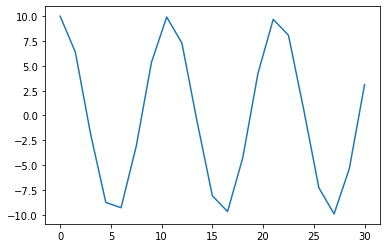

In [10]:
# use helper function to create x and y:
x,y = make_signal(amp=10.,L=30.,N=21,nwaves=2.8,ystartend=(0,0),noise=0)

# plot them with usual matplotlib commands:
plt.plot(x,y)

This is how a Profile object can be defined:

In [11]:
P = Profile(x,y,units=['mm','nm'],name='profile_1')

In [12]:
P.std()

7.044127837632114

As well, `x` and `y` can be retrieved either as `P.x` and `P.y`, or with `x,y = P()`

In [13]:
P()

(array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ]),
 array([10.        ,  6.3742399 , -1.87381315, -8.7630668 , -9.29776486,
        -3.09016994,  5.35826795,  9.92114701,  7.28968627, -0.6279052 ,
        -8.09016994, -9.68583161, -4.25779292,  4.25779292,  9.68583161,
         8.09016994,  0.6279052 , -7.28968627, -9.92114701, -5.35826795,
         3.09016994]))

In [14]:
P.x

array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
       16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ])

Plotting is standard python plotting (`matplotlib`), accept same arguments and manipulation. 

Text(0.5, 1.0, 'first signal test')

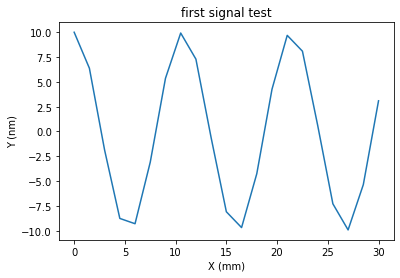

In [15]:
P.plot()
plt.title('first signal test')

In [16]:
#TODO: test remove_nan_ends.
#TODO: test register_profile.

# Profile methods and functions

## Algebric operations

We build different test profiles.

Create two similar quadratic profiles `a` and `b` with different x values: 

BEWARE: units in algebraic operations are not verified,
usually the ones from first term are used for result,
this may change in future.

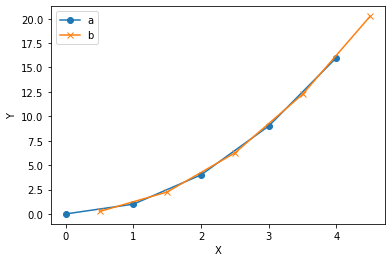

In [17]:
# Make different test profiles:

x0 = np.arange(5)

a = Profile(x0,x0**2)
a.plot(marker='o',ls='-',label = 'a')

b =  Profile(x0+0.5,(x0+0.5)**2)
b.plot(marker='x',ls='-',label = 'b')

plt.legend(loc=0)

Algebraic operations can be performed on `Profile` objects. 

Resampling can be directly accessed by `resample` method, but there is usually no need to perform, because it is automatically handled by algebraic operations (resample on first by default, ):

In [18]:
c = a.resample(b)

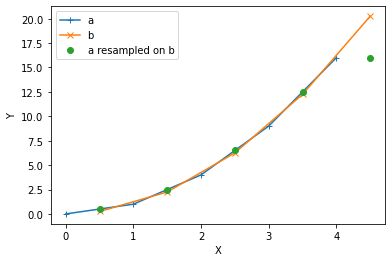

In [19]:
# plot interpolation

a.plot(marker='+',ls='-',label = 'a')
b.plot(marker='x',ls='-',label = 'b')
c.plot(marker='o',ls='',label='a resampled on b')

plt.legend(loc=0)

Here some examples of algebraic operations on different `x`: 

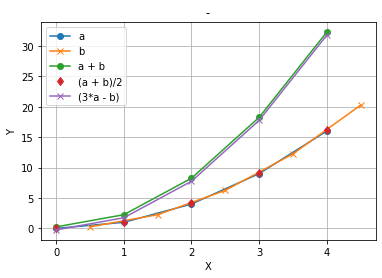

In [20]:

a.plot(marker='o',ls='-', label = 'a')
b.plot(marker='x',ls='-', label = 'b')
(a+b).plot(label = 'a + b',marker='o')
((a+b)/2).plot(label = '(a + b)/2',marker='d',ls='')
(3*a-b).plot(label = '(3*a - b)',marker='x',ls='-')
plt.grid()
plt.legend(loc=0)

Text(0.5, 1.0, 'ratio between interpolated and original')

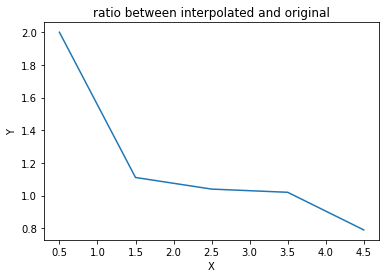

In [21]:
#(a/b).plot(label='a/b')
#(b/a).plot(label='b/a')
(c/b).plot()
plt.title('ratio between interpolated and original')

## Leveling

In [22]:
# riproduce esempio di matlab da:
# https://it.mathworks.com/help/matlab/data_analysis/detrending-data.html
#
#

fn = r'input_data\matlab-normaldata.dat'


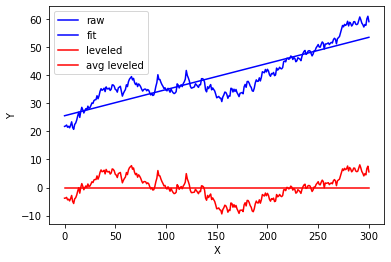

In [23]:
y = np.genfromtxt(fn)
p=Profile(np.arange(len(y)),y)
p.plot(color='b',label = 'raw')
(p-p.level()).plot(color='b',label = 'fit')
p.level().plot(color='r',label = 'leveled')
plt.plot(p.x,p.y*0+p.level().y.mean(),color='r',label = 'avg leveled')
plt.legend()

### Outliers filtering

TBD

In [24]:
a=0

In [25]:
a = 1

In [26]:
print(a)

1
